# **This file is not a solution. It is an example and demonstration of the work done and the decisions taken in order to acheive the final output of the system.** Please see the alternative scripts for the solution

Importing the libraries to be used within the intial data analysis. The data csv file is then read using the Pandas read function and stored in the data variable.

The category names for song genre is transformed into categorical data.
 


In [0]:
# Importing the libraries for the project
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
# Configure the output display of Matplotlib, the library used for displaying the graphs
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

# Reads and stores the two datasets 
data = pd.read_csv('msd_genre_dataset.csv')
wpmdata = pd.read_csv('wpmdata.csv')

# Converts the genre labels to numerical values within both datasets. This is an important step for the training and testing of the machine learning model
data ['genre'] = data['genre'].astype('category')
data['new_genre'] = data['genre'].cat.codes
wpmdata['genre'] = wpmdata['genre'].astype('category')
wpmdata['new_genre'] = wpmdata['genre'].cat.codes


Demonstrating that the dataset has no obvious apparent arrounous data points. 

In [0]:
# Displays the columns within the dataset and the number of NaN values found within each column
data.isna().sum()

genre             0
track_id          0
artist_name       0
title             0
loudness          0
tempo             0
time_signature    0
key               0
mode              0
duration          0
avg_timbre1       0
avg_timbre2       0
avg_timbre3       0
avg_timbre4       0
avg_timbre5       0
avg_timbre6       0
avg_timbre7       0
avg_timbre8       0
avg_timbre9       0
avg_timbre10      0
avg_timbre11      0
avg_timbre12      0
var_timbre1       0
var_timbre2       0
var_timbre3       0
var_timbre4       0
var_timbre5       0
var_timbre6       0
var_timbre7       0
var_timbre8       0
var_timbre9       0
var_timbre10      0
var_timbre11      0
var_timbre12      0
new_genre         0
dtype: int64

(§ 3.2.5 Implementation - Feature Aggregation) The average for both Timbre variance and Timbre average across the 12 input values are calculated. These values are stored within two seperate columns within the dataset. 

In [0]:
# Calculates the average timbre value and stores it in an additional column within the dataset
data['tim_avg'] = 0
# Iterates through each song within the dataset
for i in range(len(data['avg_timbre1'])):
  # Calculates 1 average value to represent the 12 average timbre values
  data['tim_avg'].iloc[i]= (data['avg_timbre1'].iloc[i]+data['avg_timbre2'].iloc[i]+data['avg_timbre3'].iloc[i]+data['avg_timbre4'].iloc[i]+
                     data['avg_timbre5'].iloc[i]+data['avg_timbre5'].iloc[i]+data['avg_timbre7'].iloc[i]+data['avg_timbre8'].iloc[i]+
                     data['avg_timbre9'].iloc[i]+data['avg_timbre10'].iloc[i]+data['avg_timbre11'].iloc[i]+data['avg_timbre12'].iloc[i])/12

# Calculates an average variance timbre value and stores it within an additional column in the dataset
data['tim_var'] = 0
# Iterates through each song within the dataset
for i in range(len(data['var_timbre1'])):
  # Calculates one representative value for the 12 average variance values
  data['tim_var'].iloc[i]= (data['var_timbre1'].iloc[i]+data['var_timbre2'].iloc[i]+data['var_timbre3'].iloc[i]+data['var_timbre4'].iloc[i]+
                     data['var_timbre5'].iloc[i]+data['var_timbre5'].iloc[i]+data['var_timbre7'].iloc[i]+data['var_timbre8'].iloc[i]+
                     data['var_timbre9'].iloc[i]+data['var_timbre10'].iloc[i]+data['var_timbre11'].iloc[i]+data['var_timbre12'].iloc[i])/12  

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


(§ 3.2.5 Implementation - Feature aggregation) The distribution of four data rows using both the average and variance timbre are plotted. This shows how well the avarage value for average timbre and timbre variance are represented. The distributions show both average values do not well represent their respective 12 data points and therefore the idea of feature aggregation is not used.

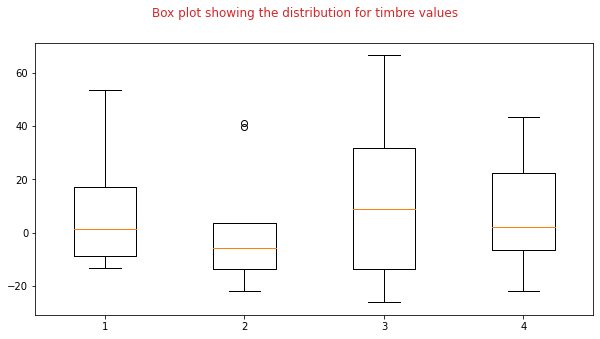

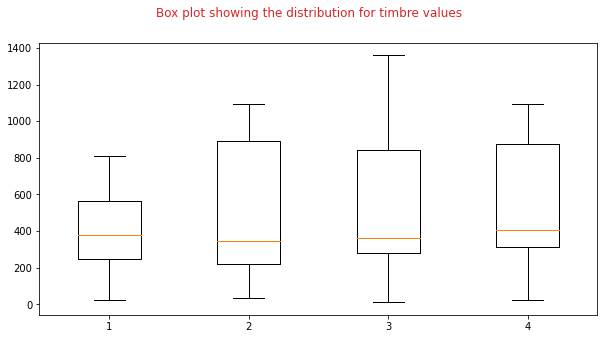

In [0]:
# Intialise 4 arrays, dediacated to store the 12 average timbre variance values for one song 
test_data_var1 = [] 
test_data_var2 = []
test_data_var3 = []
test_data_var4 = []

# Intialise 4 arrays, dediacated to store the 12 average timbre values for one song 
test_data_avg1 = []
test_data_avg2 = []
test_data_avg3 = []
test_data_avg4 = []

# Each letter represents one song within the dataset. For example K represents song the data for the song in the 3rd row.
k = 3
j = 4
k1 = 5
j1 = 6

# Function to return the 12 timbre values associated with one song. 
def get_data(text1,text2):
  # Iteratres through each timbre value
  for i in range(1,10):
    # Adds the timbre value for the specified song to the specified array
    test_data_var1.append(data[text1+str(i)].iloc[k])
    test_data_var2.append(data[text1+str(i)].iloc[j])
    test_data_var3.append(data[text1+str(i)].iloc[k1])
    test_data_var4.append(data[text1+str(i)].iloc[j1])

    test_data_avg1.append(data[text2+str(i)].iloc[k])
    test_data_avg2.append(data[text2+str(i)].iloc[j])
    test_data_avg3.append(data[text2+str(i)].iloc[k1])
    test_data_avg4.append(data[text2+str(i)].iloc[j1])

# Plot the 12 timbre values for each song on a distribution plot to examine if the average value evenly represents the data spread
def box_plot(data1,data2,data3,data4):
  fig = plt.figure()
  ax = fig.add_subplot()
  ax.boxplot([data1,data2,data3,data4])
  fig.suptitle("Box plot showing the distribution for timbre values",fontsize=12, color ='C3')
get_data('avg_timbre','var_timbre')


box_plot(test_data_var1,test_data_var2,test_data_var3,test_data_var4)
box_plot(test_data_avg1,test_data_avg2,test_data_avg3,test_data_avg4)

(§ 3.2.4 Implementation - Feature reduction) Creates the two datasets used for PCA. 

In [0]:
# Creates a dataset for the Million Song Dataset to use for PCA. Drops the columns not needed 
msd_pca = data.drop(columns=['genre','title','track_id','artist_name','new_genre','tim_avg','tim_var'])
# Creates a dataset for the Words Per Song dataset to use for PCA. Drops the columns not needed 
wpm_pca = wpmdata.drop(columns=['genre','title','track_id','artist_name','new_genre'])

# Display the number of input features associated with each dataset
print("Total number of features in the Million Song Genre Dataset "+str(msd_pca.shape[1]))
print("Total number of features in the Words Per Minute Dataset "+str(wpm_pca.shape[1]))

Total number of features in the Million Song Genre Dataset 30
Total number of features in the Words Per Minute Dataset 31


(§ 3.2.1 Implementation - Data Pre-processing Normalisation)Performs standard scalling on the datasets to normalize the input data.

In [0]:
# Use normalisations on the each dataset
from sklearn.preprocessing import StandardScaler
wpm_pca = StandardScaler().fit_transform(wpm_pca)
msd_pca = StandardScaler().fit_transform(msd_pca)

(§ 3.2.4 Implementation - Feature reduction) Performs PCA on the two datasets. Outputs the number of components needed to make up 95% of the datsets information. PCA orders the features in there relevance for outputting the most information corrolating to the output.

In [0]:
# Imports the PCA library
from sklearn.decomposition import PCA

# Performs PCA on the Words per song dataset. Only selects the features needed for 95% variance within the dataset
pca = PCA(.95)
pca.fit(wpm_pca)
wpm_pca = pca.transform(wpm_pca)

# Performs PCA on the Million Song dataset. Only selects the features needed for 95% variance within the dataset
pca2 = PCA(.95)
pca2.fit(msd_pca)
msd_pca = pca2.transform(msd_pca)

# Stores the number of features remaining for each dataset within a new variable
wpm_after = wpm_pca.shape[1]
msd_after = msd_pca.shape[1]

# Prints the number of features after 95% variance PCA.
print("Number of features needed for 95% variance within the Million Song Genre Dataset "+ str(msd_after))
print("Number of features needed for 95% variance within the Words Per Song Dataset "+ str(wpm_after))

Number of features needed for 95% variance within the Million Song Genre Dataset 22
Number of features needed for 95% variance within the Words Per Song Dataset 22


(§ 3.2.4 Implementation - Feature reduction) Both PCA plots, showing the number of features needed to achieve a total (%)variance, are compared. The most noteworthy factor is that orignally the WPM dataset had one additonal feature but they both result with needing 22 features for 95% variance. Similarly, the plot also shows that 9 input factors within the WPM dataset and 8 within the MSD dataset are not needed for 100 variance. 

Text(0.5, 1.0, 'Results of PCA on the MSD and WPM dataset')

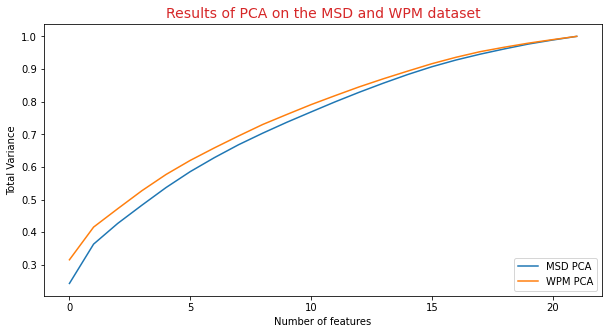

In [0]:
# Plots both PCA curves for each dataset
pca_1 = PCA().fit(msd_pca.data)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
pca_2 = PCA().fit(wpm_pca.data)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.legend(['MSD PCA', 'WPM PCA'], loc='lower right')
plt.ylabel('Total Variance')
plt.xlabel('Number of features')
plt.title('Results of PCA on the MSD and WPM dataset', fontsize=14, color = "C3")

Three different datasets were created to test which produced the best accuracy;
1. PCA version of the MSD dataset 
2. PCA version of the words per song dataset

In [0]:
# Renames the name of the PCA datasets for the MSD dataset and words per song dataset
PCA_MSD = msd_pca
PCA_WPM = wpm_pca

The relevant librarires were imported for Keras and Tensorflow to enable the creation of the ANN and CNN models

In [0]:
# Imports the libraries needed for implementing the ANN and CNN
from __future__ import print_function
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
import tensorflow as tf

# Converts the labels into categorical(numerical) values. Categorical values are needed for the Neural Network to understand
wpm_labels = wpmdata['new_genre']
msd_labels = data['new_genre']
wpm_Y = to_categorical(wpm_labels)
msd_Y = to_categorical(msd_labels)

Performs the train test split using 33% for testing and the 67% for training. I use random state 42 to randomise the data within the train and test sets. Seed 42 was used so the same randomization can be replicated for furture investigations. 

In [0]:
# Imports the SKLearn train test split library
from sklearn.model_selection import train_test_split
# Performs the train and test split on the PCA MSD and WPM dataset
wpm_x_train,wpm_x_test,wpm_y_train,wpm_y_test = train_test_split(PCA_WPM,wpm_Y,test_size = 0.20,random_state = 42)
msd_x_train,msd_x_test,msd_y_train,msd_y_test = train_test_split(PCA_MSD, msd_Y,test_size = 0.20,random_state = 42)

(§ 3.2.2.3 Implementation - Optimation of architecture) An example of the process that was repeated for each dataset to find the maximum accuracy and after how many interations and which model complexity. This exaample shows the ANN optimization implementation.

In [0]:
# Initalise and array to store the loss and accuracy values of each model
loss_and_accuracy = []
# Sets the learning rate used within the ANN
sgd = optimizers.SGD(lr=0.01)

# Initalises one ANN with 4 hidden layers
model1 = Sequential()
model1.add(Dense(units = 64, activation =LeakyReLU(alpha=0.1), input_dim = msd_x_train.shape[1]))
model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 256, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 256, activation = LeakyReLU(alpha=0.1)))
model1.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
model1.add(Dense(units=10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# Initialises a second ANN with 2 hidden layers
model2 = Sequential()
model2.add(Dense(units = 64, activation =LeakyReLU(alpha=0.1), input_dim = msd_x_train.shape[1]))
model2.add(Dense(units = 128,activation =LeakyReLU(alpha=0.1)))
model2.add(Dense(units=10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# Initialises a third ANN with 3 hidden layers
model3 = Sequential()
model3.add(Dense(units = 64, activation = LeakyReLU(alpha=0.1), input_dim = msd_x_train.shape[1]))
model3.add(Dense(units = 128, activation =LeakyReLU(alpha=0.1)))
model3.add(Dense(units = 256, activation = LeakyReLU(alpha=0.1)))
model3.add(Dense(units=10,activation='softmax'))
model3.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

# Used an iterative loop for each model. Training up to 120 epochs, increasing by 20 epochs each time
# Each model is declared above with varying levels of complexity.
for i in range(0,100,20):
  # Fits the model wtih teh training and test data and the number of epochs defined by the iterative loop
  model1.fit(msd_x_train,msd_y_train,epochs=i, batch_size= 32)
  # Measures the loss and accuracy of the model
  loss,accuracy = model1.evaluate(msd_x_test,msd_y_test,batch_size  = 32)
  # Adds the loss and accuracy to the array
  loss_and_accuracy.append([loss,accuracy, i,1])
for i in range(0,100,20):
  model2.fit(msd_x_train,msd_y_train,epochs=i, batch_size= 32)
  loss,accuracy = model2.evaluate(msd_x_test,msd_y_test,batch_size  = 32)
  loss_and_accuracy.append([loss,accuracy, i,2])
for i in range(0,100,20):
  model3.fit(msd_x_train,msd_y_train,epochs=i, batch_size= 32)
  loss,accuracy = model3.evaluate(msd_x_test,msd_y_test,batch_size  = 32)
  loss_and_accuracy.append([loss,accuracy, i,3])

Plots the output accuracy of each of the created models

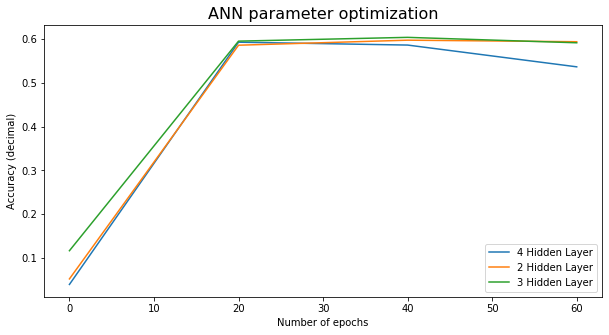

In [0]:
# Plots a graph displaying the accuracy of each model and at how many epochs
loss_and_accuracy = np.array(loss_and_accuracy)
plt.plot(loss_and_accuracy[0:4,2] ,loss_and_accuracy[0:4,1])
plt.plot(loss_and_accuracy[5:9,2] ,loss_and_accuracy[5:9,1])
plt.plot(loss_and_accuracy[10:14,2] ,loss_and_accuracy[10:14,1])
plt.legend(['4 Hidden Layer', '2 Hidden Layer','3 Hidden Layer'], loc='lower right')
plt.ylabel('Accuracy (decimal)')
plt.xlabel('Number of epochs')
plt.title('ANN parameter optimization', fontsize=16)
plt.show()

(§ 3.2.2.4 Implementation) Creation of the autoencoder model

In [0]:
# Imports the libraries for the Autoencoder
from keras.layers import Input, Dense
from keras.models import Model

# Defines the input shape within the first layer of the autoencoder
x = Input(shape=(22,))
# Defines how many outputs within the encoding
encoded = Dense(2,activation = 'relu')(x)
# Defines the decoding layer and the number of expected outputs
decoded = Dense(22,activation = 'sigmoid')(encoded)

# Creates the autoencoder based upon the defined layers. 
autoencoder = Model(x,decoded)
encoder =Model(x,encoded)
encoded_input = Input(shape=(2,))
decoder_layer = autoencoder.layers[-1]
sgd = optimizers.SGD(lr=0.01)
decoder = Model(encoded_input,decoder_layer(encoded_input))
autoencoder.compile(optimizer=sgd,loss='mse')
autoencoder.fit(msd_x_train,msd_x_train,epochs=100,shuffle=True,
                validation_data=(msd_x_test,msd_x_test))

# Takes the test data and outputs two data points for each song by only using the encoding part of the autoencoder.
test = encoder.predict(msd_x_test)


A graph showing the groupings based upon the autoencoder output. Genres are defined within colours

In [0]:
#Plots the two datapoints for each song based upon the encoding of the autoencoder. Plots them on a scatter plot to examine if there is defined groupings 
fig, axis = plt.subplots()
scatter =axis.scatter(test[:,0],test[:,1],c=y_test3)
plt.figure(figsize=(300,200))
legend1 = axis.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
axis.add_artist(legend1)
plt.show()

(§ 3.2.2.2 Implementation - Feature reduction) Reshaping of the input data for the CNN. This is so the input data is in the correct format for the convolutional kernels. This process is done for both the training and testing data.

In [0]:
# Reshapes the training and test data so it is in the correct format for the CNN 
x_train1 = np.reshape(msd_x_train,(msd_x_train.shape[0],msd_x_train.shape[1],1))
x_test1 = np.reshape(msd_x_test,(msd_x_test.shape[0],msd_x_test.shape[1],1))

Prints out the new shape of the input data. 

In [0]:
# Prints the shape of the reshaped data
x_train1.shape

(47680, 22, 1)

(§ 3.2.2.3 Implementation - Model architecture optimization) The optimal model architecture is determined for the implementation of the CNN. This is done by implementing multiple different variations of the architecture and examining the output. 

In [0]:
# Creation of an array to store the loss and accuracy variables
loss_and_accuracy2 = []
# Code to create the Convolutional Neural Network. Each model has a different level of complexity
model = Sequential()
model.add(Conv1D(filters= 32 , kernel_size=3, activation = LeakyReLU(alpha=0.1), input_shape = (22,1)))
model.add(Conv1D(filters= 128 , kernel_size=3, activation =LeakyReLU(alpha=0.1)))
model.add(Conv1D(filters= 256 , kernel_size=3, activation = LeakyReLU(alpha=0.1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model1 = Sequential()
model1.add(Conv1D(filters= 32 , kernel_size=3, activation = LeakyReLU(alpha=0.1), input_shape = (22,1)))
model1.add(Conv1D(filters= 128 , kernel_size=3, activation =LeakyReLU(alpha=0.1)))
model1.add(Conv1D(filters= 256 , kernel_size=3, activation = LeakyReLU(alpha=0.1)))
model1.add(Conv1D(filters= 128 , kernel_size=3, activation =LeakyReLU(alpha=0.1)))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model2 = Sequential()
model2.add(Conv1D(filters= 32 , kernel_size=3, activation = LeakyReLU(alpha=0.1), input_shape = (22,1)))
model2.add(Conv1D(filters= 128 , kernel_size=3, activation =LeakyReLU(alpha=0.1)))
model2.add(MaxPooling1D(pool_size=2))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(100,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Loops through training and testing each model after a different number of epochs
for i in range(0,80,20):
  model1.fit(x_train1,msd_y_train,epochs=i, batch_size= 32)
  loss,accuracy = model1.evaluate(x_test1,msd_y_test,batch_size  = 32)
  loss_and_accuracy2.append([loss,accuracy, i,1])
for i in range(0,80,20):
  model2.fit(x_train1,msd_y_train,epochs=i, batch_size= 32)
  loss,accuracy = model2.evaluate(x_test1,msd_y_test,batch_size  = 32)
  loss_and_accuracy2.append([loss,accuracy, i,2])
for i in range(0,80,20):
  model.fit(x_train1,msd_y_train,epochs=i, batch_size= 32)
  loss,accuracy = model.evaluate(x_test1,msd_y_test,batch_size  = 32)
  loss_and_accuracy2.append([loss,accuracy, i,3])

Displays the output from the model optimization

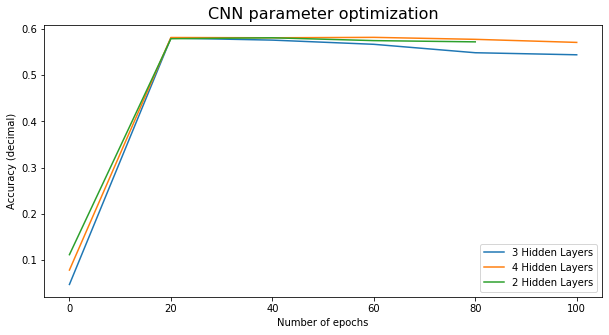

In [0]:
loss_and_accuracy2 = np.array(loss_and_accuracy2)
plt.plot(loss_and_accuracy2[0:6,2] ,loss_and_accuracy2[0:6,1])
plt.plot(loss_and_accuracy2[6:12,2] ,loss_and_accuracy2[6:12,1])
plt.plot(loss_and_accuracy2[12:18,2] ,loss_and_accuracy2[12:18,1])
plt.legend(['3 Hidden Layers', '4 Hidden Layers','2 Hidden Layers'], loc='lower right')
plt.ylabel('Accuracy (decimal)')
plt.xlabel('Number of epochs')
plt.title('CNN parameter optimization', fontsize=16)
plt.show()